In [91]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
from empiricaldist import Pmf
from empiricaldist import Cdf

In [92]:
pre_penguin_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv')
pre_penguin_df.dtypes.value_counts()

float64    4
object     3
int64      1
dtype: int64

In [93]:
pre_penguin_df.shape

(344, 8)

In [94]:
(pre_penguin_df.isnull().any())

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

In [95]:
(pre_penguin_df.isnull().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

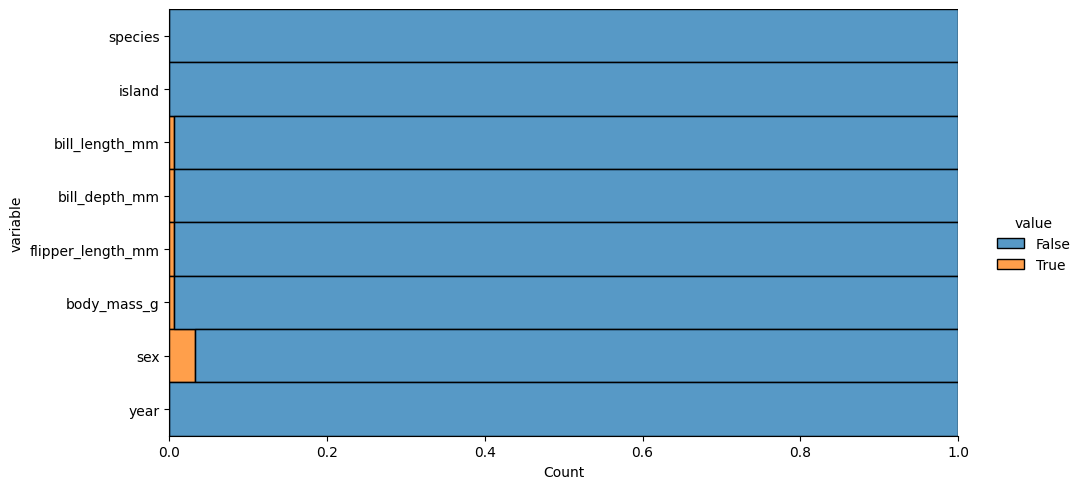

In [96]:
(pre_penguin_df
    .isnull()
    .melt()
    .pipe(
            lambda df : (
                sns.displot(
                    data= df,
                    y= 'variable',
                    hue='value',
                    multiple= 'fill',
                    aspect=2
                )
            )
    )
)

<Axes: >

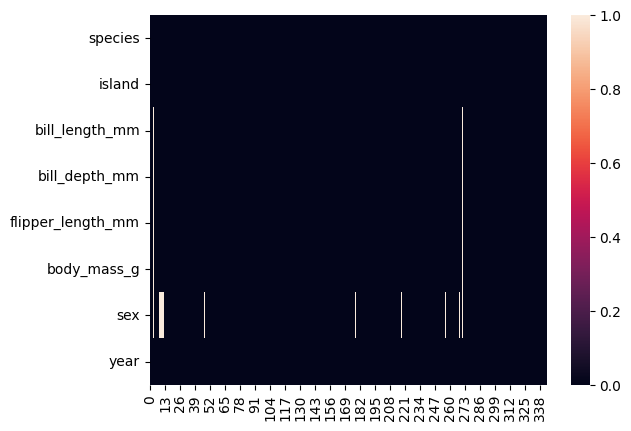

In [97]:
(
    pre_penguin_df
    .isnull()
    .transpose()
    .pipe(
        lambda df : (
            sns.heatmap(
                data= df
            )
        )
    )

)

In [98]:
df_purge = (
    pre_penguin_df
    .dropna()
)

In [99]:
df_purge.describe(include=[np.number])

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [100]:
df_purge.describe(include=object)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


In [101]:
(
    df_purge.astype({
        'species' : 'category',
        'island' : 'category',
        'sex' : 'category'
    })
    .describe(include = 'category')
)



,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


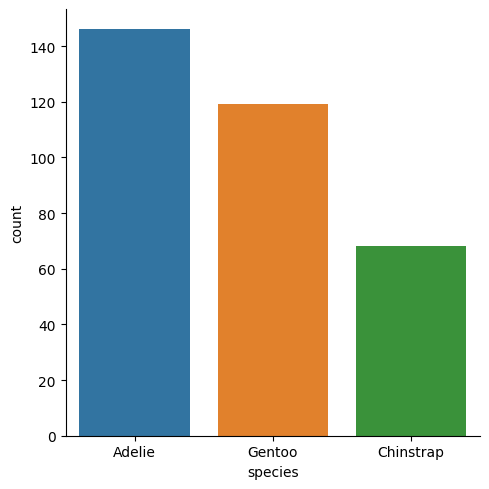

In [102]:
(
    sns.catplot(
        data = df_purge,
        x= 'species',
        kind= 'count'
    )
)

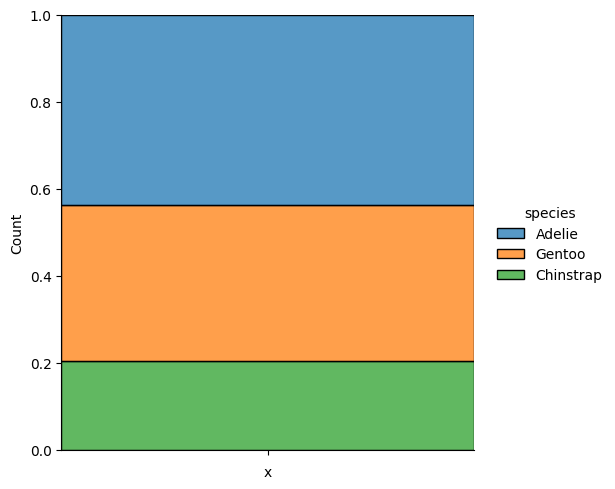

In [103]:
#OTRA FORMA
(
    df_purge
    .add_column('x', '')
    .pipe(
        lambda df : (
            sns.displot(
                data= df,
                x = 'x',
                hue='species',
                multiple= 'fill'
            )
        )
    )
)

In [104]:
PANDAS = df_purge.body_mass_g.mean()
NUMPY = np.mean(df_purge.body_mass_g)

#EN GENERAL, PUEDES CALCULAR EL PROMEDIO DE TODAS TUS VARIABLES NUMERICAS CON MEAN SIN ESPECIFICAR LA VARIABLE.
df_purge.mean()

/tmp/ipykernel_4770/3620122427.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_purge.mean()


bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
year                 2008.042042
dtype: float64

In [105]:
df_purge.median()
df_purge.mode()

/tmp/ipykernel_4770/3318386277.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_purge.median()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,male,2009


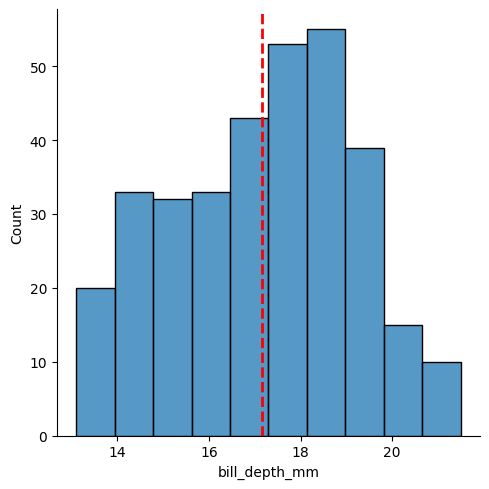

In [106]:
sns.displot(data= df_purge, x= 'bill_depth_mm', kind='hist')
plt.axvline(
    x= df_purge.bill_depth_mm.mean(),
    color = 'red',
    linestyle= 'dashed',
    linewidth= 2
)

<Axes: xlabel='bill_depth_mm'>

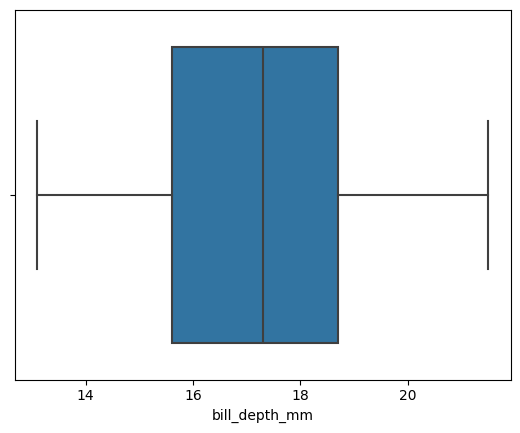

In [107]:
sns.boxplot(data=df_purge, x= 'bill_depth_mm')

FUNCIONES DE PROBABILIDAD DE MASAS

<Axes: xlabel='flipper_length_mm', ylabel='Probability'>

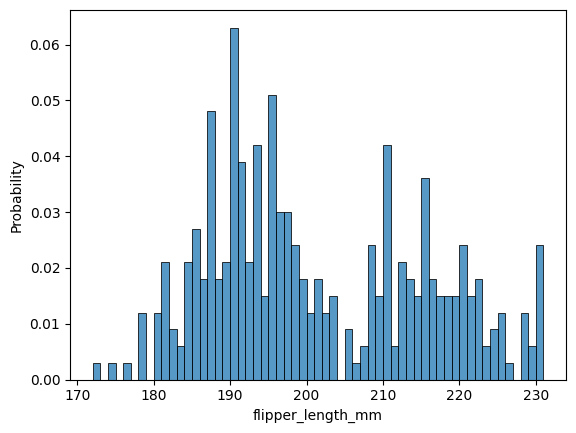

In [108]:
sns.histplot(data= df_purge, x= 'flipper_length_mm', binwidth=1, stat='probability')

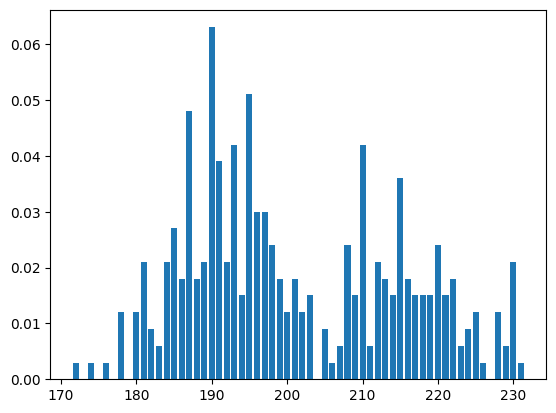

In [109]:
pmf_flipper_length_mm = empiricaldist.Pmf.from_seq(
    df_purge.flipper_length_mm,
    normalize = True
)

pmf_flipper_length_mm.bar()

In [110]:
df_purge.flipper_length_mm.max()

231.0

FUNCIONES EMPIRICAS DE PROBABILIDAD ACUMULADA ECDFs

<Axes: xlabel='flipper_length_mm', ylabel='Proportion'>

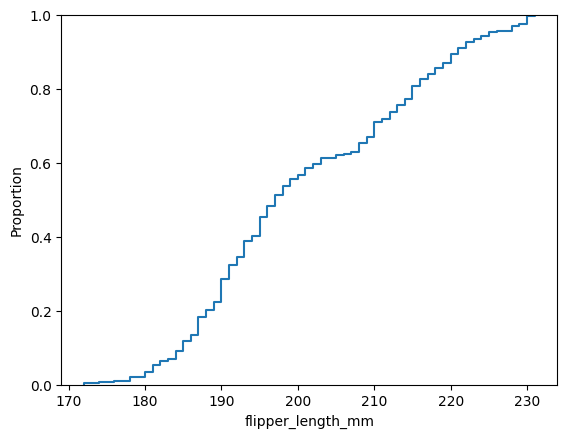

In [111]:
#SEABORN VS EMPIRICALDIST; La diferencia esta en el detallado de la información que quieres visualizar, empirical te permite ver visualizaciónes más detallladas.

sns.ecdfplot(
    data= df_purge,
    x= 'flipper_length_mm'
)

In [112]:
CDF_flipper_length_mm = Cdf.from_seq(
    df_purge.flipper_length_mm
)


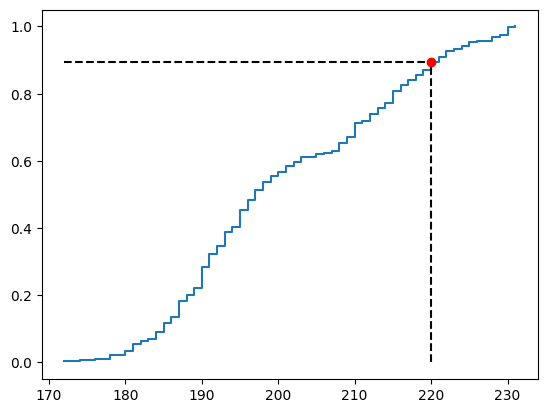

In [113]:
CDF_flipper_length_mm.step()
q=220
p = CDF_flipper_length_mm.forward(q)

plt.vlines(
    x=q,
    ymin= 0,
    ymax= p,
    color = 'black',
    linestyle = 'dashed'
)

plt.hlines(
    y= p,
    xmin = CDF_flipper_length_mm.qs[0],
    xmax= q,
    color = 'black',
    linestyle = 'dashed' 
)

plt.plot(q, p, 'ro')

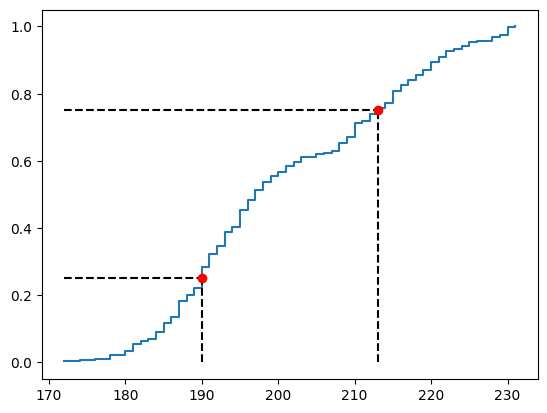

In [114]:
CDF_flipper_length_mm.step()

q25 = 0.25
q75= 0.75

iqr = (q25, q75)
qs = CDF_flipper_length_mm.inverse(iqr)

plt.vlines(
    x= qs,
    ymin= 0,
    ymax= iqr,
    color = 'black',
    linestyle= 'dashed'
)

plt.hlines(
    y= iqr,
    xmin= CDF_flipper_length_mm.qs[0],
    xmax= qs,
    color= 'black',
    linestyle= 'dashed'
)
plt.scatter(
    x= qs,
    y= iqr,
    color= 'red',
    zorder= 2
)

<Axes: xlabel='flipper_length_mm', ylabel='Proportion'>

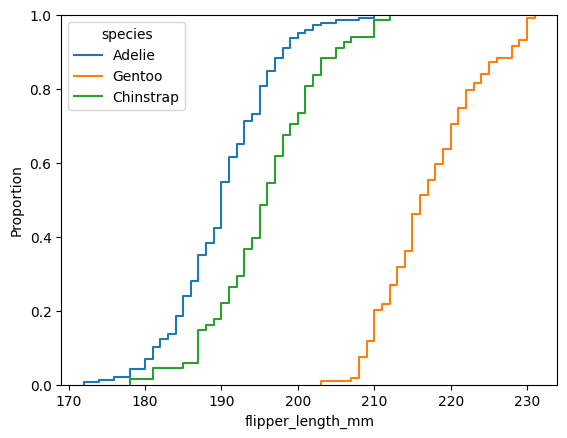

In [115]:
sns.ecdfplot(
    data = df_purge,
    x= 'flipper_length_mm',
    hue= 'species'
)

FUNCIONES DE DENSIDADA DE PROBABILIDAD

<Axes: xlabel='flipper_length_mm', ylabel='Density'>

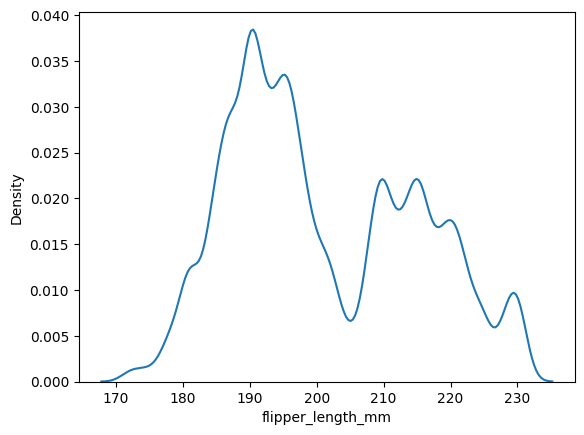

In [116]:
sns.kdeplot(
    data= df_purge,
    x= 'flipper_length_mm',
    bw_method = 0.1

)

In [117]:
stats = df_purge.flipper_length_mm.describe()
#stats = df_purge.bill_depth_mm.describe()
stats

count    333.000000
mean     200.966967
std       14.015765
min      172.000000
25%      190.000000
50%      197.000000
75%      213.000000
max      231.000000
Name: flipper_length_mm, dtype: float64

In [118]:
stats_vector = np.linspace(stats['min'], stats['max'])
stats_vector

array([172.        , 173.20408163, 174.40816327, 175.6122449 ,
       176.81632653, 178.02040816, 179.2244898 , 180.42857143,
       181.63265306, 182.83673469, 184.04081633, 185.24489796,
       186.44897959, 187.65306122, 188.85714286, 190.06122449,
       191.26530612, 192.46938776, 193.67346939, 194.87755102,
       196.08163265, 197.28571429, 198.48979592, 199.69387755,
       200.89795918, 202.10204082, 203.30612245, 204.51020408,
       205.71428571, 206.91836735, 208.12244898, 209.32653061,
       210.53061224, 211.73469388, 212.93877551, 214.14285714,
       215.34693878, 216.55102041, 217.75510204, 218.95918367,
       220.16326531, 221.36734694, 222.57142857, 223.7755102 ,
       224.97959184, 226.18367347, 227.3877551 , 228.59183673,
       229.79591837, 231.        ])

In [119]:
stats_normalize = scipy.stats.norm(stats['mean'], stats['std']).pdf(stats_vector)
stats_normalize

array([0.0033633 , 0.00400196, 0.00472688, 0.00554207, 0.00645005,
       0.0074516 , 0.00854536, 0.0097276 , 0.01099199, 0.01232938,
       0.01372781, 0.01517246, 0.01664582, 0.01812798, 0.01959694,
       0.02102916, 0.02240012, 0.023685  , 0.02485943, 0.02590024,
       0.0267862 , 0.02749877, 0.02802271, 0.02834664, 0.02846348,
       0.02837064, 0.02807016, 0.02756865, 0.026877  , 0.02601003,
       0.02498593, 0.02382567, 0.02255223, 0.02118988, 0.01976343,
       0.01829746, 0.01681566, 0.01534024, 0.01389136, 0.01248683,
       0.01114178, 0.00986851, 0.00867647, 0.00757233, 0.00656011,
       0.0056414 , 0.00481568, 0.00408059, 0.00343229, 0.00286575])

<Axes: xlabel='flipper_length_mm', ylabel='Density'>

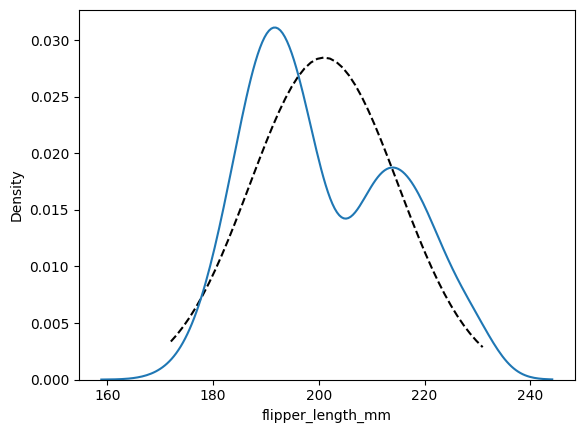

In [120]:
plt.plot(stats_vector, stats_normalize, color= 'black', linestyle= 'dashed')
#empiricaldist.Cdf.from_seq(df_purge.flipper_length_mm, normalize= True).plot()
sns.kdeplot(
    data= df_purge,
    x= 'flipper_length_mm'
)

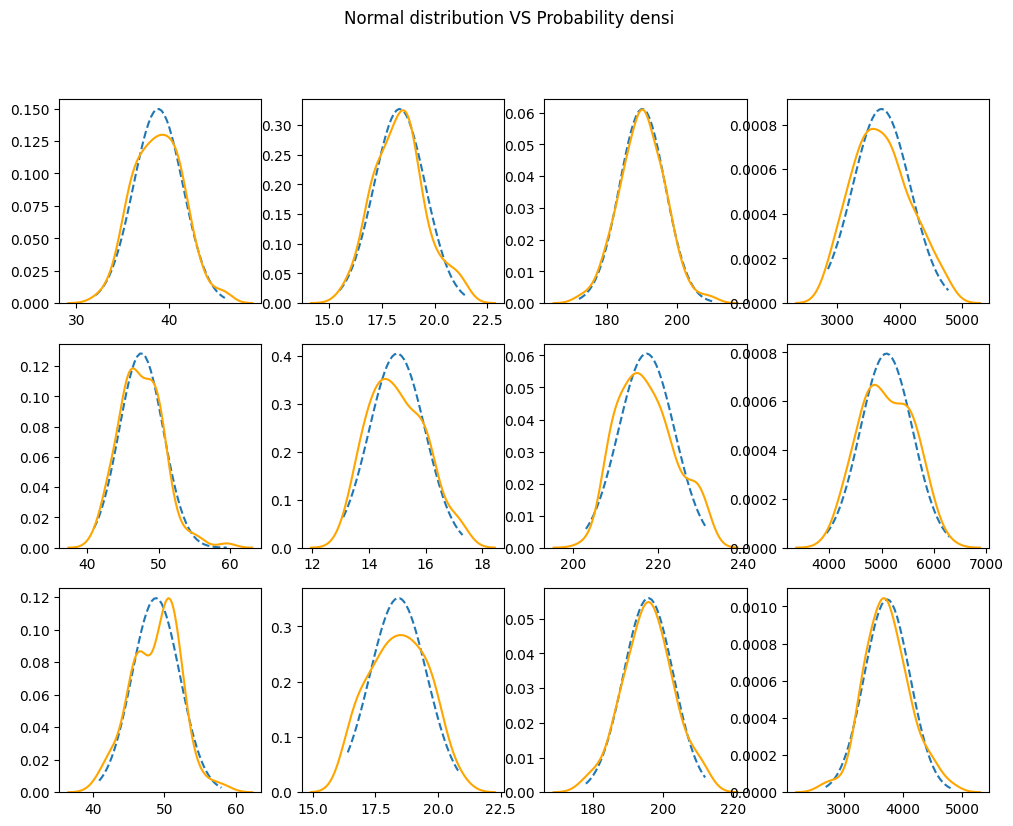

In [121]:
species = df_purge.species.unique()
categories = df_purge.select_dtypes(include=float).keys()

fig, axes = plt.subplots(3, 4, figsize= (12,9))

fig.suptitle('Normal distribution VS Probability densi')

for i, specie in enumerate(species):
    for j, category in enumerate(categories):
        stats = (df_purge[df_purge.species == specie])[category].describe()
        vec_x = np.linspace(stats['min'], stats['max'])
        vec_y = scipy.stats.norm(stats['mean'], stats['std']).pdf(vec_x)
        axes[i][j].plot(vec_x, vec_y, linestyle= '--')
        sns.kdeplot(
            ax= axes[i][j],
            data= df_purge[df_purge.species == specie],
            x= category,
            color= 'orange'
        )
        axes[i][j].set_ylabel('')
        axes[i][j].set_xlabel('')

LEY DE LOS GRANDES NÚMEROS Y TEOREMA DE LIMITE CENTRAL

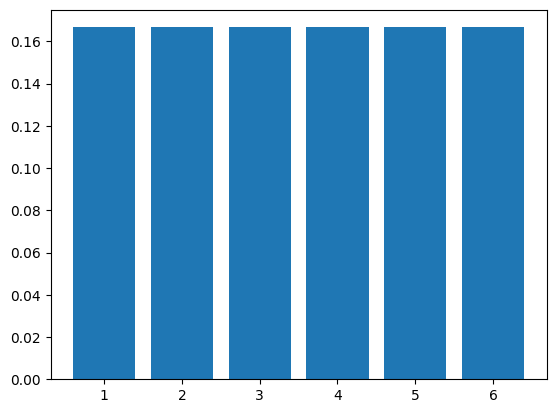

In [122]:
dice = empiricaldist.Pmf.from_seq([1,2,3,4,5,6])
dice.bar()

In [123]:
#INVESTIGAR BIEN LO ANTERIOR

RELACIONES ENTRE VARIABLES

<Axes: xlabel='flipper_length_mm', ylabel='bill_depth_mm'>

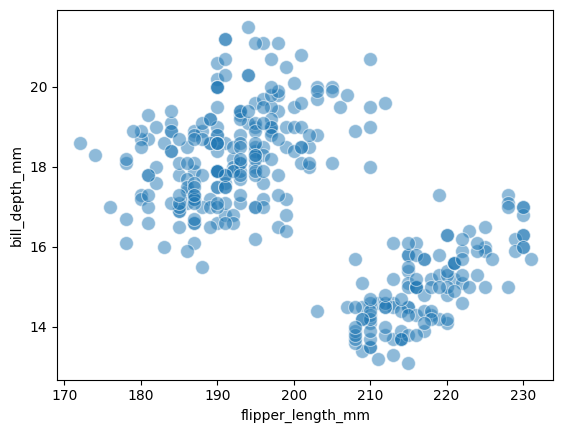

In [124]:
sns.scatterplot(
    data= pre_penguin_df,
    x= 'flipper_length_mm',
    y= 'bill_depth_mm',
    alpha = 1/2,
    s = 100
)

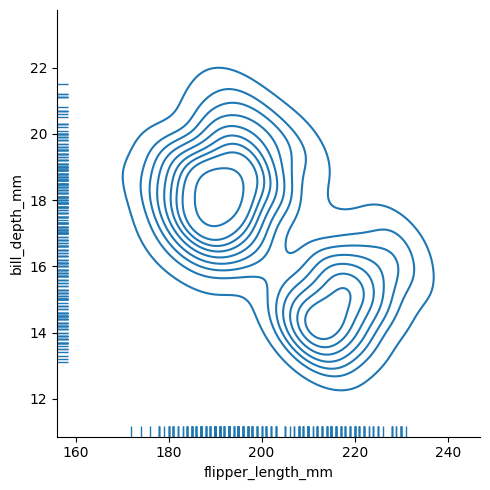

In [125]:
sns.displot(
    data= pre_penguin_df,
    x= 'flipper_length_mm',
    y= 'bill_depth_mm',
    rug = True,
    kind = 'kde'

)

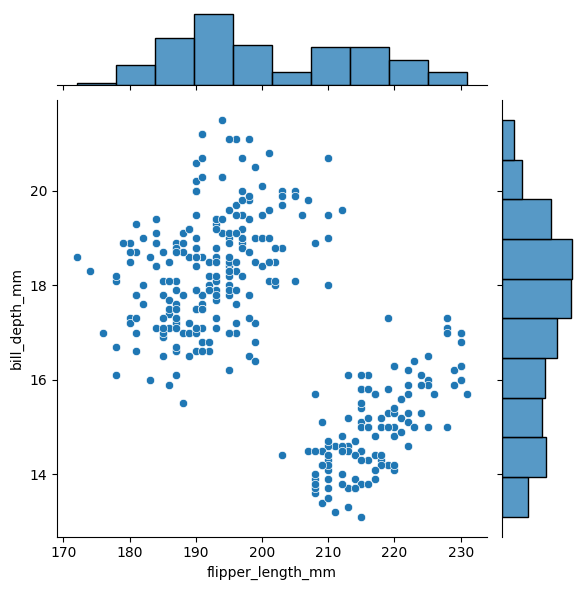

In [126]:
sns.jointplot(
    data= pre_penguin_df,
    x= 'flipper_length_mm',
    y= 'bill_depth_mm',
)

GRAFICOS DE VIOLIN Y BOXPLOTS

<Axes: xlabel='species', ylabel='bill_depth_mm'>

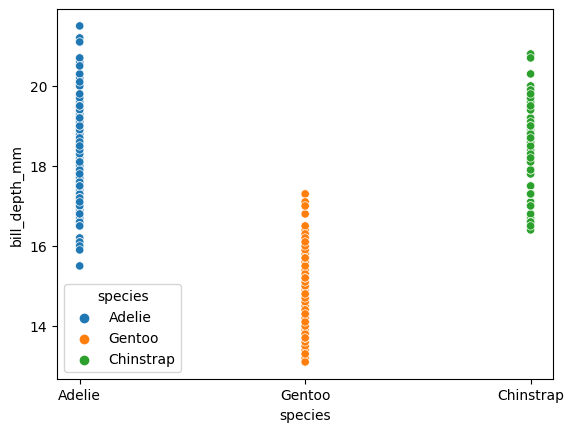

In [127]:
sns.scatterplot(
    data= pre_penguin_df,
    x= 'species',
    y= 'bill_depth_mm',
    hue= 'species'
)

<Axes: xlabel='species', ylabel='bill_depth_mm'>

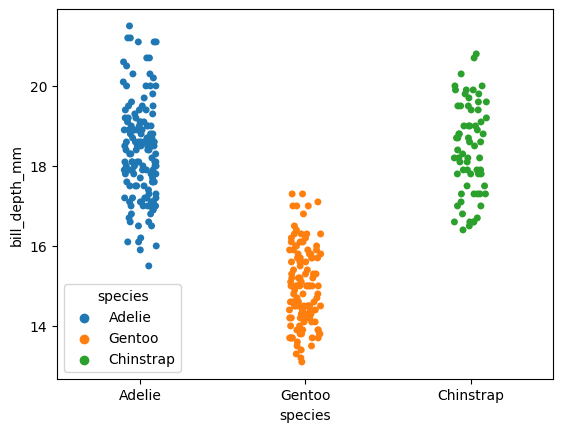

In [128]:
sns.stripplot(
    data= pre_penguin_df,
    x= 'species',
    y= 'bill_depth_mm',
    hue= 'species'
)

<Axes: xlabel='species', ylabel='bill_depth_mm'>

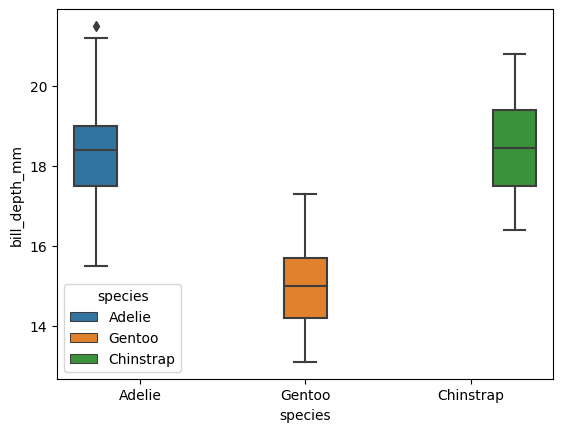

In [129]:
sns.boxplot(
    data= pre_penguin_df,
    x= 'species',
    y= 'bill_depth_mm',
    hue= 'species'
)

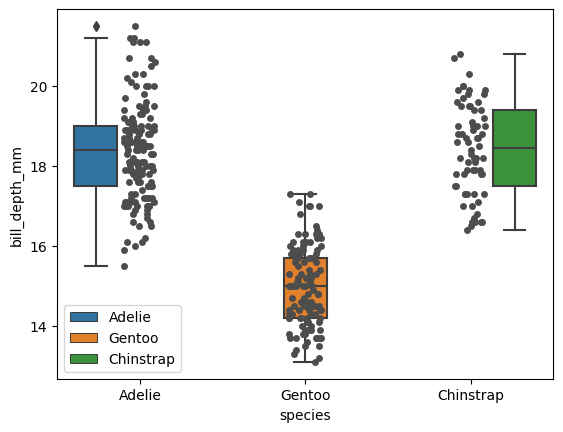

In [130]:
ax = sns.boxplot(
    data= pre_penguin_df,
    x= 'species',
    y= 'bill_depth_mm',
    hue= 'species'
)

ax =sns.stripplot(
    data= pre_penguin_df,
    x= 'species',
    y= 'bill_depth_mm',
    color= ".3"
)

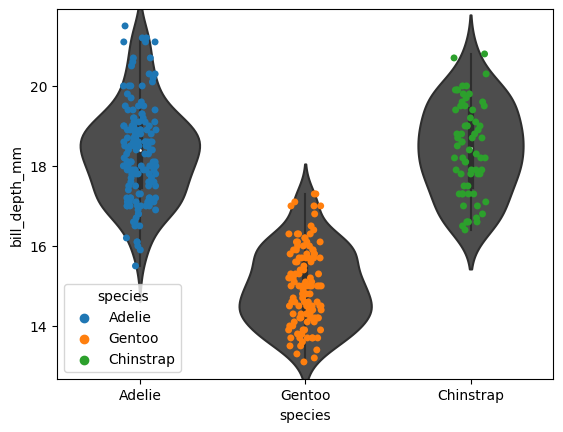

In [131]:
ax = sns.violinplot(
    data= pre_penguin_df,
    x= 'species',
    y= 'bill_depth_mm',
    color= '.3'

)
ax = sns.stripplot(
    data= pre_penguin_df,
    x= 'species',
    y= 'bill_depth_mm',
    hue= 'species'

)

<Axes: xlabel='species', ylabel='bill_depth_mm'>

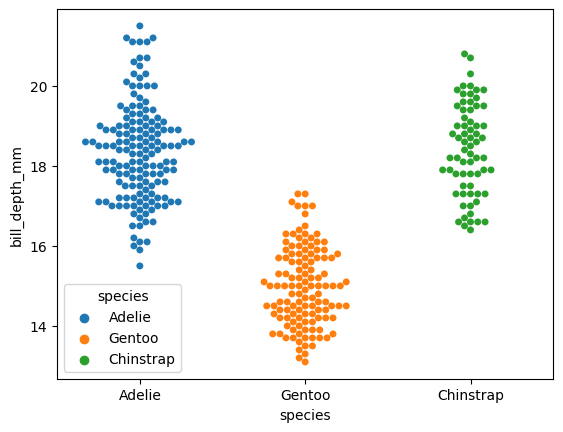

In [132]:
sns.swarmplot(
    data= pre_penguin_df,
    x= 'species',
    y= 'bill_depth_mm',
    hue= 'species'
)

CORRELACIONES ENTRE VARUABLES

In [133]:
df_purge.corr()

/tmp/ipykernel_4770/2957657194.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_purge.corr()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,0.032657
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,-0.048182
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,0.151068
body_mass_g,0.589451,-0.472016,0.872979,1.000000,0.021862
year,0.032657,-0.048182,0.151068,0.021862,1.000000


/tmp/ipykernel_4770/1996078436.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_purge.corr(),


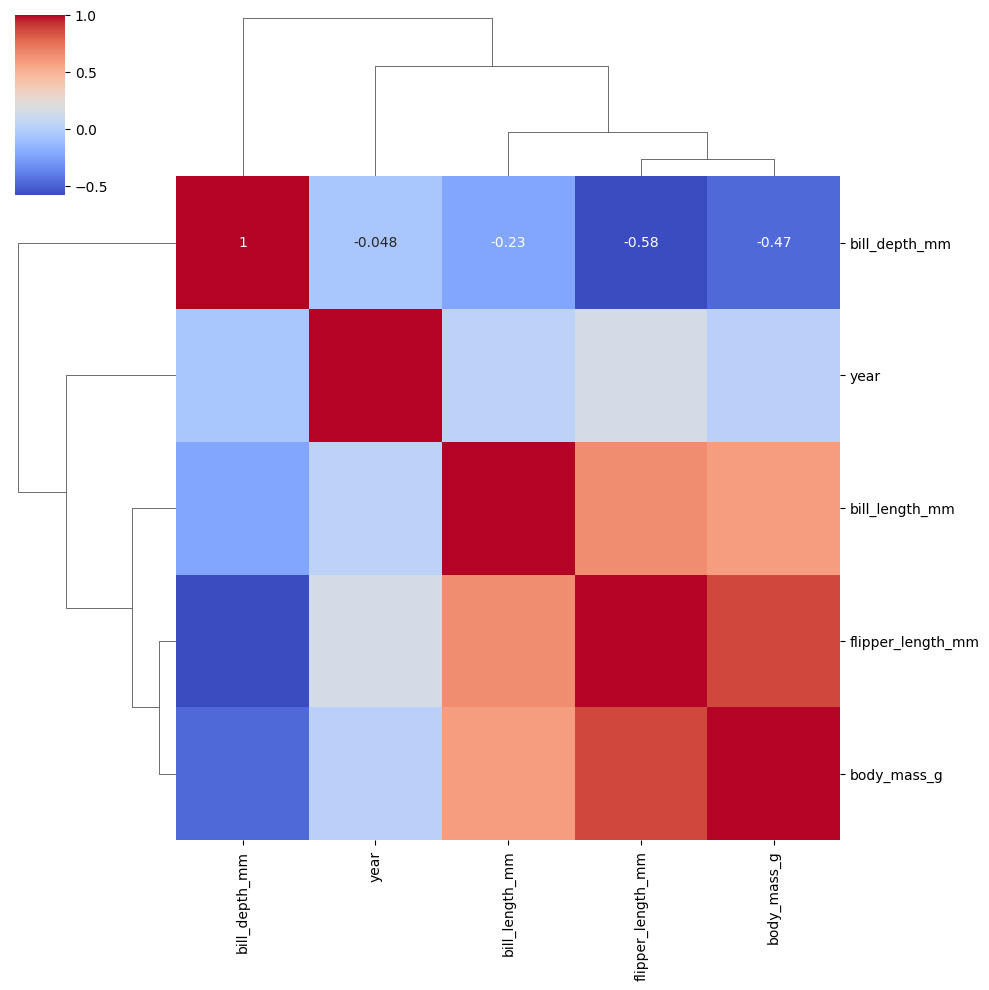

In [134]:
sns.clustermap(
    df_purge.corr(),
    annot= True,
    cmap='coolwarm'
)

In [135]:
#convertir una variable categorica en discreta con 0 y 1
#processed_penguins_df['numeric_sex']= processed_penguins_df['sex'].map({'female':0, 'male':1})#

ANÁLISIS DE REGRESIÓN SIMPLE

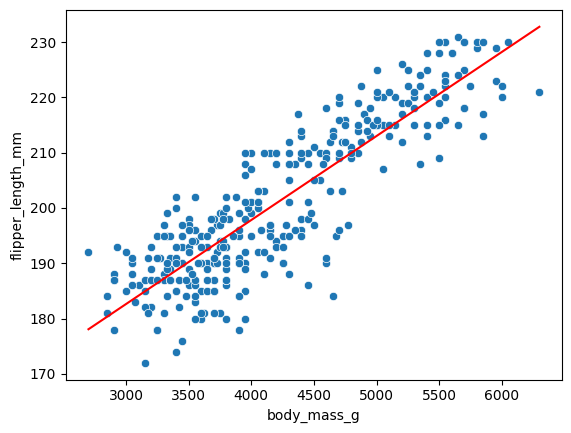

In [136]:
sns.scatterplot(
    data= df_purge,
    x= 'body_mass_g',
    y= 'flipper_length_mm',
)

regretion_penguis= scipy.stats.linregress(
    x= df_purge.body_mass_g,
    y= df_purge.flipper_length_mm,
)

fx_1 = np.array([df_purge.body_mass_g.min(), df_purge.body_mass_g.max()])
fy_1 = regretion_penguis.intercept + regretion_penguis.slope * fx_1
plt.plot(fx_1, fy_1, color= 'red')

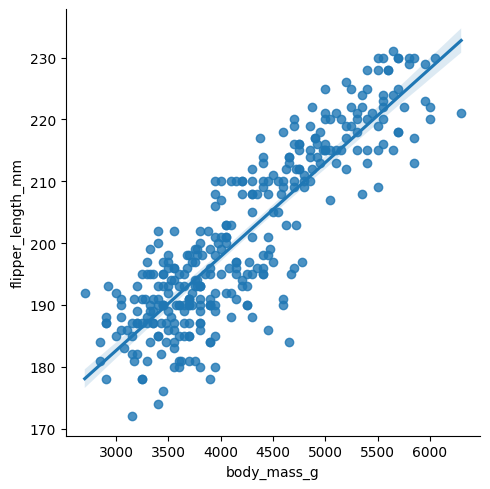

In [137]:
#regresion simple más fácil
sns.lmplot(
    data= df_purge,
    x= 'body_mass_g',
    y= 'flipper_length_mm',
)

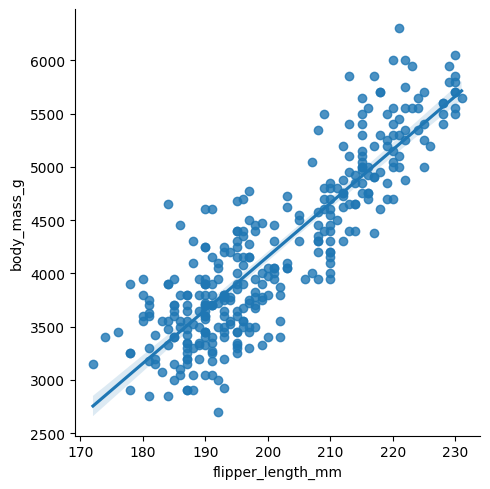

In [138]:
sns.lmplot(
    data= df_purge,
    y= 'body_mass_g',
    x= 'flipper_length_mm',
)

OLVIDÉ MI BÁSCULA PARA PESAR PINGUINOS, ¿¿CÚAL SERÍA LA MEJOR FORMA DE CAPTURAR ESE DATO?

In [144]:
#MODELO 1= 
model_2= (
    smf.ols(
        formula = 'body_mass_g ~ bill_length_mm + bill_depth_mm',
        data = df_purge
    )
    .fit()
)
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     144.8
Date:                Fri, 08 Mar 2024   Prob (F-statistic):           7.04e-46
Time:                        20:18:39   Log-Likelihood:                -2595.2
No. Observations:                 333   AIC:                             5196.
Df Residuals:                     330   BIC:                             5208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3413.4519    437.911      7.795      0.000    2552.002    4274.902
bill_length_mm    74.8126      6.076     12.313      0.000      62.860      86.765
bill_depth_mm   -145.5072     16.873     -8.624      0.000    -178.699    -112.315
==============================================================================
Omnibus:                        2.839   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.175
Skew:                          -0.000   Prob(JB):                        0.337
Kurtosis:                       2.604   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [145]:
#MODELO 2
model_3= (
    smf.ols(
        formula = 'body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm',
        data = df_purge
    )
    .fit()
)
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Fri, 08 Mar 2024   Prob (F-statistic):          9.26e-103
Time:                        20:20:49   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6445.4760    566.130    -11.385      0.000   -7559.167   -5331.785
bill_length_mm        3.2929      5.366      0.614      0.540      -7.263      13.849
bill_depth_mm        17.8364     13.826      1.290      0.198      -9.362      45.035
flipper_length_mm    50.7621      2.497     20.327      0.000      45.850      55.675
==============================================================================
Omnibus:                        5.596   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.469
Skew:                           0.312   Prob(JB):                       0.0649
Kurtosis:                       3.068   Cond. No.                     5.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [146]:
#MODEL 3
model_4= (
    smf.ols(
        formula = 'body_mass_g ~ bill_length_mm + bill_depth_mm + flipper_length_mm + C(sex)',
        data = df_purge
    )
    .fit()
)
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Fri, 08 Mar 2024   Prob (F-statistic):          6.28e-122
Time:                        20:23:33   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.male]      541.0285     51.710     10.463      0.000     439.304     642.753
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [149]:
#MODELO 5
model_5=(
    smf.ols(
        formula = 'body_mass_g ~ flipper_length_mm',
        data= df_purge
    )
    .fit()
)
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     1060.
Date:                Fri, 08 Mar 2024   Prob (F-statistic):          3.13e-105
Time:                        20:27:20   Log-Likelihood:                -2461.1
No. Observations:                 333   AIC:                             4926.
Df Residuals:                     331   BIC:                             4934.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5872.0927    310.285    -18.925      0.000   -6482.472   -5261.713
flipper_length_mm    50.1533      1.540     32.562      0.000      47.123      53.183
==============================================================================
Omnibus:                        5.922   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                5.876
Skew:                           0.325   Prob(JB):                       0.0530
Kurtosis:                       3.025   Cond. No.                     2.90e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

VISUALIZACIÓN DE RESULTADOS DEL MODELO